One of the shortcomings of the model results from Notebook is due to the fact of considering a single sample for training set as well as for test set (a single trial of 66% for training and 34% for testing was used to build the model). The objective of this Notebook is to repeat the same experiment, but now with different (same size) samples as training and test sets.


### 1. Repeat the  holdout procedure at least 30 times 
#### a. report the means, variances, and confidence Intervals (CI) for the accuracy results on the training and testing sets for the chosen model in notebook 1 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# load data
tb=pd.read_csv("rebin_music.csv")
tb.columns.values
tb.drop("Unnamed: 0",axis=1,inplace=True)

In [414]:
y=tb[["mood(s)"]].replace("dinner",0).replace("sleep",1).replace("workout",2).replace("party",3)
x=tb.drop("mood(s)",axis=1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

tr_train_accuracy=[]
nb_train_accuracy=[]
tr_test_accuracy=[]
nb_test_accuracy=[]
for i in range(150):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.34)
    dt=DecisionTreeClassifier(max_depth=100,min_samples_split=30,min_samples_leaf=15)
    dt.fit(xtrain,ytrain)
    ptrain_dt=dt.predict(xtrain)
    ptest_dt=dt.predict(xtest)
    tr_train_accuracy.append(np.round(accuracy_score(ytrain,ptrain_dt),3))
    tr_test_accuracy.append(np.round(accuracy_score(ytest,ptest_dt),3))
    
    #normalize the data because gausian naive bayes assume features to be normal distributed
    scaler=StandardScaler()
    scaler.fit(xtrain)
    xtest=scaler.transform(xtest)
    xtrain=scaler.transform(xtrain)
    nb=GaussianNB()
    nb.fit(xtrain,ytrain)
    ptrain_nb=nb.predict(xtrain)
    ptest_nb=nb.predict(xtest)
    
    nb_train_accuracy.append(np.round(accuracy_score(ytrain,ptrain_nb),3))
    nb_test_accuracy.append(np.round(accuracy_score(ytest,ptest_nb),3))

C:\Anacon\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
def range_calculate_90(lst):
    n=150
    m=np.round(np.array(lst).mean(),3)
    v=np.round(m*(1-m)/n,3)
    std=np.sqrt(v)
    upper_bond=np.round(m+std*1.65,3)
    lower_bound=np.round(m-std*1.65,3)
    return ["mean accuracy={}".format(m),"variance={}".format(v),"90% CI upper bound={}".format(upper_bond),"90% CI lower bound={}".format(lower_bound)]


#### b. After repeatingly conducting holdout sampling for about 150 times I am able to come up with the result below for decision tree and naïve bayes models.

In [527]:
print("The decision tree model on training set:","\n",range_calculate_90(tr_train_accuracy))
print("\nThe decision tree model on testing set:","\n",range_calculate_90(tr_test_accuracy))
print("\nThe naive bayes on training set:","\n",range_calculate_90(nb_train_accuracy))
print("\nThe naive bayes on testing set:","\n",range_calculate_90(nb_test_accuracy))

The decision tree model on training set: 
 ['mean accuracy=0.811', 'variance=0.001', '90% CI upper bound=0.863', '90% CI lower bound=0.759']

The decision tree model on testing set: 
 ['mean accuracy=0.73', 'variance=0.001', '90% CI upper bound=0.782', '90% CI lower bound=0.678']

The naive bayes on training set: 
 ['mean accuracy=0.733', 'variance=0.001', '90% CI upper bound=0.785', '90% CI lower bound=0.681']

The naive bayes on testing set: 
 ['mean accuracy=0.721', 'variance=0.001', '90% CI upper bound=0.773', '90% CI lower bound=0.669']


#### c. Using a pair t-test, compare the mean accuracy of the Naïve Bayes and the mean accuracy of the Decision tree and discuss the results.

Note: To use the paired t-test, I  build and test the two classifiers ( decision tree and Naïve Bayes) on the same sample data above.  In other words, I do a holdout data partition and create and test both of the classifiers. Then the process is repeated for about 150 times.


In [11]:
#calculating the t statistic
tree_test_mean=np.array(tr_test_accuracy).mean()
nb_test_mean=np.array(nb_test_accuracy).mean()
d=[]
d2=[]
for i in range(len(tr_test_accuracy)):
    d_=np.round(tr_test_accuracy[i]-nb_test_accuracy[i],4)
    d.append(d_)
    d2_=np.round((d_*d_),6)
    d2.append(d2_)

D=np.array(d).sum()
D2=np.array(d2).sum()

n=150
a=(D/n)
b=D2-((D*D)/n)
c=(n-1)/n
tstatistic=a/(np.sqrt(b/c))
#pvalue=.982876

Both naïve bayes model and decision tree models are built on the same training set and the performance are measured on the same testing set for each trail of 150 sampling trails. I can then use the paired t test to measure if the performance of the two model are significantly different. 

The null hypothesis of the paired t test is that the mean accuracy of the naïve bayes model is similar to the mean accuracy of the decision tree model, and the alternative hypothesis is that they are different. 

After calculating the t statistic and with the degree of freedom 149, we learn that with the 90% confidence level, the p value is about 0.98. Therefore, we fail to reject the null hypothesis and we don’t have significant evidence to prove that the performance of the two model are significant different.



### 2. Evaluation of probabilistic classifiers using ROC and Lift curves. 



#### a.Build a naive bayes classifier but this time considering only two classes (class 0 here (positive class) versus the rest (negative class) since the ROC and lift curves can only be drawn for binary classification problems).


In [561]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.34)
class0_train=[]
class0_test=[]
GB=GaussianNB()
GB.fit(xtrain,ytrain)
GB_train_p=GB.predict_proba(xtrain)
GB_test_p=GB.predict_proba(xtest)
for i in range(len(GB_train_p)):
    class0_train.append(GB_train_p[i][0])
for i in range(len(GB_test_p)):
    class0_test.append(GB_test_p[i][0])

C:\Anacon\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [630]:
def OneVsAll_tb(classp,actual_y):
    negative=[]
    for i in np.round(classp,3):
        negative.append((i,np.round(1-i,3)))
    
    tb=pd.DataFrame(negative,actual_y).reset_index(drop=True)
    a=actual_y.reset_index(drop=True).replace(2,1).replace(3,1)
    tb=pd.concat([tb,a],axis=1)
    tb.columns=['predicted positive class probability(class0)','predicted negative class probability(others)','actual class, target=0 others=1']
    return tb

In [631]:
OneVsAll_tb(class0_train,ytrain).head()

,predicted positive class probability(class0),predicted negative class probability(others),"actual class, target=0 others=1"
0,0.721,0.279,1
1,0.303,0.697,1
2,0.346,0.654,1
3,0.651,0.349,0
4,0.204,0.796,1


 The positive class I choose here is the class 0, the dinner class, from the spotify data set. Above is the first 5 line of the table that includes the probability of the predicted positive class, the probability of the negative class (classes that are not dinner class), and the actual label of the observation relabel as 0 for positive class and 1 for negative class. With this table, I’ll be able to create the ROC curve.


#### b.	Draw the ROC curves for the Naïve Bayes performance on both the training and testing data.

In [627]:
#fuction to plot the ROC curve
from sklearn.metrics import roc_curve,auc
def roc_plot(y_true,y_p,title):
    fpr, tpr, thresholds = roc_curve(y_true,y_p, pos_label=0)
    auc_=round(auc(fpr, tpr),3)
    plt.plot(fpr, tpr,label= 'Area under the curve is{}'.format(auc_))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    d=tpr-fpr
    print('best cut off threshold maximize both the sensitivity and specificity: ',round(thresholds[d.tolist().index(max(d))],3),
          '\nThe maximizes value for sensitivity + specificity - 1 =',np.round(max(d),3))

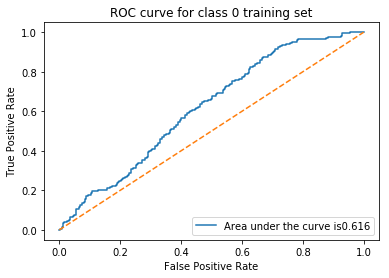

best cut off threshold maximize both the sensitivity and specificity:  0.236 
The maximizes value for sensitivity + specificity - 1 = 0.205


In [628]:
roc_plot(ytrain,class0_train,title="ROC curve for class 0 training set")

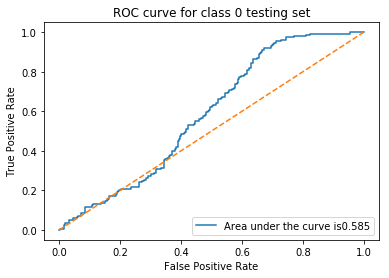

best cut off threshold maximize both the sensitivity and specificity:  0.242 
The maximizes value for sensitivity + specificity - 1 = 0.249


In [629]:
roc_plot(ytest,class0_test,title="ROC curve for class 0 testing set")

To interpret the ROC curve, if the curve is closed to the upper left corner, it means that overall the performance of the positive class is doing well. In terms of choose a certain probability threshold to maximize both sensitivity and specificity, we can measure the Euclidean distance between the ROC curve and the upper left corner of the graph or use the value that maximizes (sensitivity + specificity - 1) ,the Youden's index,  as a cut-off.

For the testing data, by maximizing the (sensitivity + specificity - 1) cut-off value, I’m able to find the best cut-off threshold to be 0.242


#### c.	Draw the lift curves for the Naïve Bayes performance on both the training and testing data. Interpret the results.  If the requirement is to get at least 80% accuracy on the data with a minimum cost of data acquisition, what size for the data would you recommend to reach that accuracy performance?


In [22]:
#create a fuction to make lift plot, gain plot and the table
def lif_tb_plot(y_p):
    lift_tb=y_p[['positive class probability(class0)','actual class, target=0 others=1']]
    lift_tb=lift_tb.sort_values(by=['positive class probability(class0)'],ascending=False).reset_index(drop=True)
    
    count=[]
    for i in range(10,101,10):
        count.append(int(len(lift_tb)*(i/100)))
    
    target=[]
    total_target=len(lift_tb.loc[lift_tb['actual class, target=0 others=1']==0])
    for i in count:
        target.append((len(lift_tb.loc[:i].loc[lift_tb['actual class, target=0 others=1']==0])/total_target)*100)

    cimul_count=np.array([i for i in range(10,101,10)])
    percent=pd.DataFrame(cimul_count,columns=["size count%"])
    tb=pd.DataFrame(np.round(np.array(target),2),columns=["cumulative target gain % "])

    lift=[]
    for i in range(len(target)):
        lift.append(np.round(target[i]/cimul_count[i],3))
    final=pd.concat([percent,tb],axis=1)
    lift_tb1=pd.concat([final,pd.DataFrame(lift,columns=["lift"])],axis=1)
    
    return lift_tb1, plt.plot(lift_tb1[["size count%"]],lift_tb1[["lift"]]),plt.title("lift chart"),plt.xlabel('size count%'),plt.ylabel('lift'),plt.xlim(10,100),plt.ylim(0.8,1.5),plt.plot([10, 100],[1, 1],linestyle='--'),plt.show(),plt.plot(lift_tb1[["size count%"]],lift_tb1[["cumulative target gain % "]]),plt.title("gain chart"),plt.xlabel('size count%'),plt.ylabel('cumulative target gain %'),plt.xlim(10,100),plt.plot([10, 100],[10, 100],linestyle='--'),plt.show()



Training Set


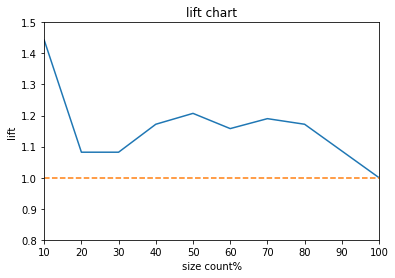

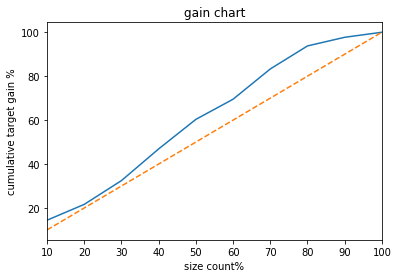

(   size count%  cumulative target gain %    lift
 0           10                      14.43  1.443
 1           20                      21.64  1.082
 2           30                      32.46  1.082
 3           40                      46.89  1.172
 4           50                      60.33  1.207
 5           60                      69.51  1.158
 6           70                      83.28  1.190
 7           80                      93.77  1.172
 8           90                      97.70  1.086
 9          100                     100.00  1.000,
 (10, 100),
 (0.8, 1.5),
 None,
 (10, 100),
 None)

In [23]:
print("Training Set")
lif_tb_plot(OneVsAll_tb(class0_train,ytrain))

Testing Set


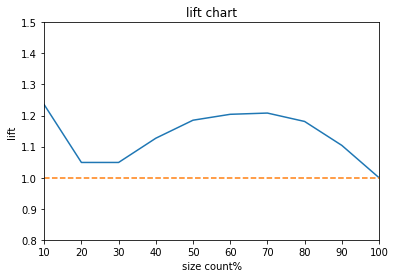

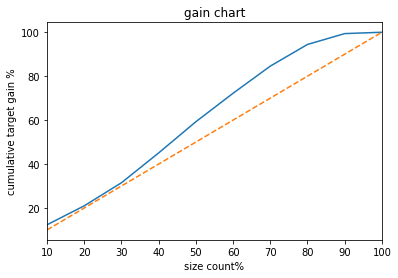

(   size count%  cumulative target gain %    lift
 0           10                      12.35  1.235
 1           20                      20.99  1.049
 2           30                      31.48  1.049
 3           40                      45.06  1.127
 4           50                      59.26  1.185
 5           60                      72.22  1.204
 6           70                      84.57  1.208
 7           80                      94.44  1.181
 8           90                      99.38  1.104
 9          100                     100.00  1.000,
 (10, 100),
 (0.8, 1.5),
 None,
 (10, 100),
 None)

In [24]:
print("Testing Set")
lif_tb_plot(OneVsAll_tb(class0_test,ytest))

Both the lift chart and the gain chart are used to evaluate the performance of the model. They both measure how much better one can expect to do with the predictive model comparing without a model. 

For the Lift Chart we can learn that when using the given model, for training data set we are able to capture about 14.43% observations that belongs to class 0 at the top 10% percentile observations belonging to class 0, that is 1.4 times as many as if we don’t apply the model. On the testing set, the model is able to capture 1.2 times positive class at the top 10% percentile as we don’t apply the model.

About the gain chart, for our model to get at leaset 80% accuracy on class 0 for both traing and testing set, we have to acquire at least 70% sample on both training set and testing set.
